In [ ]:
This is now the first row


## Mini Project III
mini-project-III
Repo with the instructions for the Mini Project III.
Topics
This mini project is dedicated to following topics:
Data Wrangling
Data Visualization
Data Preparation and Feature Engineering
Dimensionality Reduction
Unsupervised Learning
Data
We will be using old data about different financial transactions. You can download the data from here. The data contains following tables:

twm_customer - information about customers

twm_accounts - information about accounts

twm_checking_accounts - information about checking accounts (subset of twm_accounts)

twm_credit_accounts - information about checking accounts (subset of twm_accounts)

twm_savings_accounts - information about checking accounts (subset of twm_accounts)

twm_transactions - information about financial transactions

twm_savings_tran - information about savings transactions (subset of twm_transactions)

twm_checking_tran - information about savings transactions (subset of twm_transactions)

twm_credit_tran - information about credit checking (subset of twm_transactions)

Output
In this miniproject, we will:
create two separate customer segmentations (using clustering) to split them into 3-5 clusters:
based on demographics (only on the information from twm_customer)
based on their banking behavior. We can take following things into consideration as banking behavior:
do they have savings account? How much do they save?
do they have credit account? How much do they live in debt?
are they making lot of small transactions or few huge ones?
visualize the created clusters using radar charts and compare them agains each other
visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.
(stretch) visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).
we will need to create own implementation of kmeans so we can see what is happening with the clusters during the iterations.


Data Wrangling
Data Visualization
Data Preparation and Feature Engineering
Dimensionality Reduction
Unsupervised Learning

In [39]:

import pandas as pd
import os
import requests as re
import json
import pprint
import numpy as np
import unicodedata

In [40]:
#load all the data
twm_accounts = pd.read_csv('https://raw.githubusercontent.com/digitalminimal/mini-project-III/master/data/twm_accounts.csv', sep=";")
twm_customer = pd.read_csv('https://raw.githubusercontent.com/digitalminimal/mini-project-III/master/data/twm_customer.csv', sep=";")
twm_checking_accounts = pd.read_csv('https://raw.githubusercontent.com/digitalminimal/mini-project-III/master/data/twm_checking_acct.csv', sep=";")
twm_credit_accounts = pd.read_csv('https://raw.githubusercontent.com/digitalminimal/mini-project-III/master/data/twm_credit_acct.csv', sep=";")
twm_savings_accounts = pd.read_csv('https://raw.githubusercontent.com/digitalminimal/mini-project-III/master/data/twm_savings_acct.csv', sep=";")
twm_transactions = pd.read_csv('https://raw.githubusercontent.com/digitalminimal/mini-project-III/master/data/twm_transactions.csv', sep=";")
twm_savings_tran = pd.read_csv('https://raw.githubusercontent.com/digitalminimal/mini-project-III/master/data/twm_savings_tran.csv', sep=";")
twm_checking_tran = pd.read_csv('https://raw.githubusercontent.com/digitalminimal/mini-project-III/master/data/twm_checking_tran.csv', sep=";")
twm_credit_tran = pd.read_csv('https://raw.githubusercontent.com/digitalminimal/mini-project-III/master/data/twm_credit_tran.csv', sep=";")

In [41]:
listofdataframe =[twm_accounts,twm_customer,twm_checking_accounts,
                  twm_credit_accounts,twm_savings_accounts,twm_transactions,
                  twm_savings_tran,twm_checking_tran,twm_credit_tran]

for each in listofdataframe:
  
  print(each.dtypes)

# print("=========twm_customer======= \n" +str(twm_customer.dtypes)+"\n=======\n\n")
# print("=========twm_accounts======= \n" +str(twm_accounts.dtypes)+"\n=======\n\n")
# print("=========twm_checking_accounts======= \n" +str(twm_checking_accounts.dtypes)+"\n=======\n\n")
# print("=========twm_credit_accounts======= \n" +str(twm_credit_accounts.dtypes)+"\n=======\n\n")
# print("=========twm_savings_accounts======= \n" +str(twm_savings_accounts.dtypes)+"\n=======\n\n")
# print("=========twm_transactions======= \n" +str(twm_transactions.dtypes)+"\n=======\n\n")
# print("=========twm_savings_tran======= \n" +str(twm_savings_tran.dtypes)+"\n=======\n\n")
# print("=========twm_checking_tran======= \n" +str(twm_checking_tran.dtypes)+"\n=======\n\n")
# print("=========twm_credit_tran======= \n" +str(twm_credit_tran.dtypes)+"\n=======\n\n")




# dicoftable=[]
# for each in  listofdataframe:
#   print(each.dtypes)
#   # for column in each:
#   #    print(str(column))


        

# def checkIfDuplicates_3(listOfElems):
#     ''' Check if given list contains any duplicates '''    
#     for elem in listOfElems:
#         if listOfElems.count(elem) > 1:
#             return True
#     return False

# twm_savings_accounts.head(20)


acct_nbr              int64
cust_id               int64
acct_type            object
account_active       object
acct_start_date      object
acct_end_date        object
starting_balance    float64
ending_balance      float64
dtype: object
cust_id             int64
income              int64
age                 int64
years_with_bank     int64
nbr_children        int64
gender             object
marital_status      int64
name_prefix        object
first_name         object
last_name          object
street_nbr          int64
street_name        object
postal_code         int64
city_name          object
state_code         object
dtype: object
cust_id               int64
acct_nbr              int64
minimum_balance       int64
per_check_fee       float64
account_active       object
acct_start_date      object
acct_end_date        object
starting_balance    float64
ending_balance      float64
dtype: object
cust_id               int64
acct_nbr              int64
credit_limit          int64
credit_r

In [42]:
# IS there No duplates in IDs 
isduplacatetwm_credit_accounts=twm_credit_accounts.duplicated(subset=['cust_id'])
print(not any(isduplacatetwm_credit_accounts))

isduplacatetwm_savings_accounts=twm_savings_accounts.duplicated(subset=['cust_id'])
print(not any(isduplacatetwm_savings_accounts))

isduplacatetwm_checking_accounts=twm_checking_accounts.duplicated(subset=['cust_id'])
print(not any(isduplacatetwm_savings_accounts))


isduplacatetwm_accounts=twm_accounts.duplicated(subset=['acct_nbr'])
print(not any(isduplacatetwm_accounts))


#add a column to customer to flag account or not


True
True
True
True


In [43]:
#add suffix, run once
twm_customer.columns = 'customers_' + twm_customer.columns.values
twm_savings_accounts.columns = 'savings_' + twm_savings_accounts.columns.values
twm_credit_accounts.columns = 'credit_' + twm_credit_accounts.columns.values
twm_checking_accounts.columns = 'checking_' + twm_checking_accounts.columns.values

# twm_customer.rename({'customers_cust_id': 'cust_id','savings_acct_nbr':'acct_nbr'}, axis=1, inplace=True)
# twm_savings_accounts.rename({'savings_cust_id': 'cust_id'}, axis=1, inplace=True)
# twm_credit_accounts.rename({'credit_cust_id': 'cust_id'}, axis=1, inplace=True)
# twm_checking_accounts.rename({'checking_cust_id': 'cust_id'}, axis=1, inplace=True)

# twm_customer

In [44]:
twm_customer.dtypes

customers_cust_id             int64
customers_income              int64
customers_age                 int64
customers_years_with_bank     int64
customers_nbr_children        int64
customers_gender             object
customers_marital_status      int64
customers_name_prefix        object
customers_first_name         object
customers_last_name          object
customers_street_nbr          int64
customers_street_name        object
customers_postal_code         int64
customers_city_name          object
customers_state_code         object
dtype: object

In [45]:
# this works code works.
# Merge Custumer, savings and credits , run once 
new=twm_customer.merge(twm_savings_accounts, how='left',left_on='customers_cust_id', right_on='savings_cust_id')
new=new.merge(twm_credit_accounts, how='left',left_on='customers_cust_id', right_on='credit_cust_id')
new=new.merge(twm_checking_accounts, how='left',left_on='customers_cust_id', right_on='checking_cust_id')
new['credit_ending_balance'] = np.where(new['credit_ending_balance'].isnull(), 0,new['credit_ending_balance'])
new['savings_ending_balance'] = np.where(new['savings_ending_balance'].isnull(), 0,new['savings_ending_balance'])
new["debt"] = new["savings_ending_balance"] - new["credit_ending_balance"]
new['has_saving_account'] = np.where(new['savings_acct_nbr'].isnull(), "NoSavingAccount", "Has a saving Account")
new['has_credit_account'] = np.where(new['credit_acct_nbr'].isnull(), "No Credit Account", "Has a credit Account")
new['has_checking_account'] = np.where(new['checking_acct_nbr'].isnull(), "NoChecking Account", "Has a Checking Account")
new['is debt'] = np.where(new['debt'] < 0 , True,False)


# 
# print(new[['debt','savings_ending_balance','credit_ending_balance',"is debt"]])
# new

In [46]:
# because there was nan in the columsn
new['savings_cust_id'] = new['savings_cust_id'].astype('Int64')
new['savings_acct_nbr'] = new['savings_acct_nbr'].astype('Int64')
new['credit_cust_id'] = new['credit_cust_id'].astype('Int64')
new['credit_acct_nbr'] = new['credit_acct_nbr'].astype('Int64')
new['checking_cust_id'] = new['checking_cust_id'].astype('Int64')
new['checking_acct_nbr'] = new['checking_acct_nbr'].astype('Int64')


In [47]:


# print(new['savings_acct_nbr'])
# print(new['credit_acct_nbr'])

# twm_customer.merge(twm_credit_accounts, how='left', on='cust_id')

In [48]:
# new=new[]Income , Age ,Gender,Marital Status,City,Has children or not
new=new[['debt','has_saving_account','has_credit_account','has_checking_account','customers_income','customers_age','customers_gender','customers_marital_status',
          'customers_city_name','customers_nbr_children',
          'credit_account_active','credit_ending_balance','savings_account_active','savings_ending_balance','is debt','customers_cust_id']]
new.describe()

,debt,customers_income,customers_age,customers_marital_status,customers_nbr_children,credit_ending_balance,savings_ending_balance,customers_cust_id
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,7.470000e+02
mean,-33.310469,22728.281124,42.479250,1.882195,0.714859,742.338005,709.027537,1.362991e+06
std,1996.023303,22207.221405,19.114879,0.892051,1.103410,1221.492994,1663.320833,2.925255e+02
min,-9200.000000,0.000000,13.000000,1.000000,0.000000,0.000000,0.000000,1.362480e+06
25%,-773.780000,7118.500000,28.000000,1.000000,0.000000,0.000000,0.000000,1.362732e+06
50%,0.000000,17242.000000,42.000000,2.000000,0.000000,172.990000,124.130000,1.362993e+06
75%,379.740000,31338.000000,56.000000,2.000000,1.000000,1000.000000,758.420000,1.363244e+06
max,22412.780000,144157.000000,89.000000,4.000000,5.000000,9500.000000,22432.780000,1.363495e+06


In [49]:
#if there is an error here, uncomment the pip
#  !pip install plotly==5
import plotly.express as px

fig = px.histogram(new, x="debt", color="is debt", pattern_shape="has_credit_account")
fig.update_layout(
    title="Apparently there is a higher probabilty to get in debt if you have a credit card",
    legend_title_font_color="green",
    font=dict(
        family="monospace",
        size=20,
        color="RebeccaPurple"))
fig.show()


# fig = px.histogram(new, x="dept", color  pattern_shape="credit_account_active")
# fig.show()




In [50]:
df_transactions = pd.DataFrame()
df_transactions=twm_transactions.merge(twm_savings_accounts[['savings_acct_nbr','savings_cust_id']], how='left',left_on='acct_nbr', right_on='savings_acct_nbr')
df_transactions=df_transactions.merge(twm_credit_accounts[['credit_acct_nbr','credit_cust_id']], how='left',left_on='acct_nbr', right_on='credit_acct_nbr')
df_transactions=df_transactions.merge(twm_checking_accounts[['checking_acct_nbr','checking_cust_id']], how='left',left_on='acct_nbr', right_on='checking_acct_nbr')


df_transactions['savings_cust_id'] = df_transactions['savings_cust_id'].astype('Int64')
df_transactions['savings_acct_nbr'] = df_transactions['savings_acct_nbr'].astype('Int64')
df_transactions['credit_cust_id'] = df_transactions['credit_cust_id'].astype('Int64')
df_transactions['credit_acct_nbr'] = df_transactions['credit_acct_nbr'].astype('Int64')
df_transactions['checking_cust_id'] = df_transactions['checking_cust_id'].astype('Int64')
df_transactions['checking_acct_nbr'] = df_transactions['checking_acct_nbr'].astype('Int64')

df_transactions['is_saving_transaction'] = np.where(df_transactions['savings_acct_nbr'].isnull(), 0, 1)
df_transactions['is_credit_transaction'] = np.where(df_transactions['credit_acct_nbr'].isnull(), 0, 1)
df_transactions['is_checking_transaction'] = np.where(df_transactions['checking_acct_nbr'].isnull(), 0, 1)



# Get a series containing maximum value of each row

#across the 3 account ID, find the one that is not null and add it to the universal
df_transactions['u_acct_nbr'] =df_transactions[['checking_acct_nbr','credit_acct_nbr','savings_acct_nbr']].max(axis=1).astype('Int64')

# this is slow and cause the values to change to str
# df_transactions['u_acc_id'] = df_transactions[['checking_acct_nbr','credit_acct_nbr','savings_acct_nbr']].apply(
#     lambda x: ','.join(x.dropna().astype(str)),
#     axis=1
# )
# # df_transactions['u_acc_id'] = df_transactions['u_acc_id'].astype(float)
# print(df_transactions.dtypes)
# =======================


df_transactions.dtypes

tran_id                      int64
acct_nbr                     int64
tran_amt                   float64
principal_amt              float64
interest_amt               float64
new_balance                float64
tran_date                   object
tran_time                    int64
channel                     object
tran_code                   object
savings_acct_nbr             Int64
savings_cust_id              Int64
credit_acct_nbr              Int64
credit_cust_id               Int64
checking_acct_nbr            Int64
checking_cust_id             Int64
is_saving_transaction        int64
is_credit_transaction        int64
is_checking_transaction      int64
u_acct_nbr                   Int64
dtype: object

In [51]:
# print(df_transactions['tran_id'].describe())

# print(df_transactions.groupby(["u_acct_nbr"])['tran_id'].describe())
print(df_transactions.groupby(["u_acct_nbr"])['tran_amt'].describe())

                  count        mean         std  ...    50%      75%      max
u_acct_nbr                                       ...                         
13624802           99.0   -2.474646  319.322539  ...  -0.15    0.000  1534.10
13624803           26.0   18.550769  231.528228  ...   1.36    1.690   414.78
13624842           99.0  -25.435758  138.154837  ... -14.05    0.000   727.19
13624843           33.0   58.474545  210.168824  ...  20.44  147.960   778.27
13624852           99.0   -1.659495  205.203456  ...  -0.15    0.000   895.73
...                 ...         ...         ...  ...    ...      ...      ...
4561143213634830   77.0    0.334805  291.550065  ... -51.66    0.000   990.61
4561143213634840   39.0   12.080513  258.590930  ... -54.86   71.535   879.22
4561143213634850   23.0  139.239565  890.147439  ... -20.00    0.000  4202.51
4561143213634860   38.0    0.000000    0.000000  ...   0.00    0.000     0.00
4561143213634920   29.0  -61.280690  701.313479  ... -98.52  656

In [52]:
df_transactions

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code,savings_acct_nbr,savings_cust_id,credit_acct_nbr,credit_cust_id,checking_acct_nbr,checking_cust_id,is_saving_transaction,is_credit_transaction,is_checking_transaction,u_acct_nbr
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ,13625623,1362562,<NA>,<NA>,<NA>,<NA>,1,0,0,13625623
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ,<NA>,<NA>,<NA>,<NA>,13628392,1362839,0,0,1,13628392
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD,<NA>,<NA>,<NA>,<NA>,13630842,1363084,0,0,1,13630842
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK,<NA>,<NA>,<NA>,<NA>,13631412,1363141,0,0,1,13631412
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ,<NA>,<NA>,<NA>,<NA>,13625722,1362572,0,0,1,13625722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR,<NA>,<NA>,<NA>,<NA>,13631752,1363175,0,0,1,13631752
77576,94,13626772,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD,<NA>,<NA>,<NA>,<NA>,13626772,1362677,0,0,1,13626772
77577,42,13625262,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD,<NA>,<NA>,<NA>,<NA>,13625262,1362526,0,0,1,13625262
77578,98,13627052,-423.80,-423.80,0.0,162.28,13.6.1995,110209,E,WD,<NA>,<NA>,<NA>,<NA>,13627052,1362705,0,0,1,13627052


In [53]:
df_transactions['u_acct_nbr']


0                13625623
1                13628392
2                13630842
3                13631412
4                13625722
               ...       
77575            13631752
77576            13626772
77577            13625262
77578            13627052
77579    4561143213632570
Name: u_acct_nbr, Length: 77580, dtype: Int64

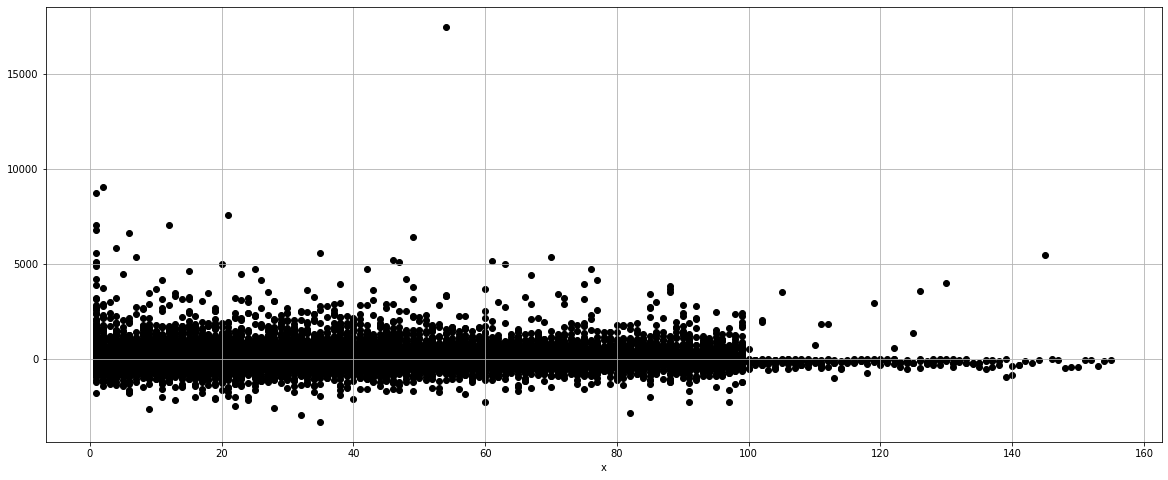

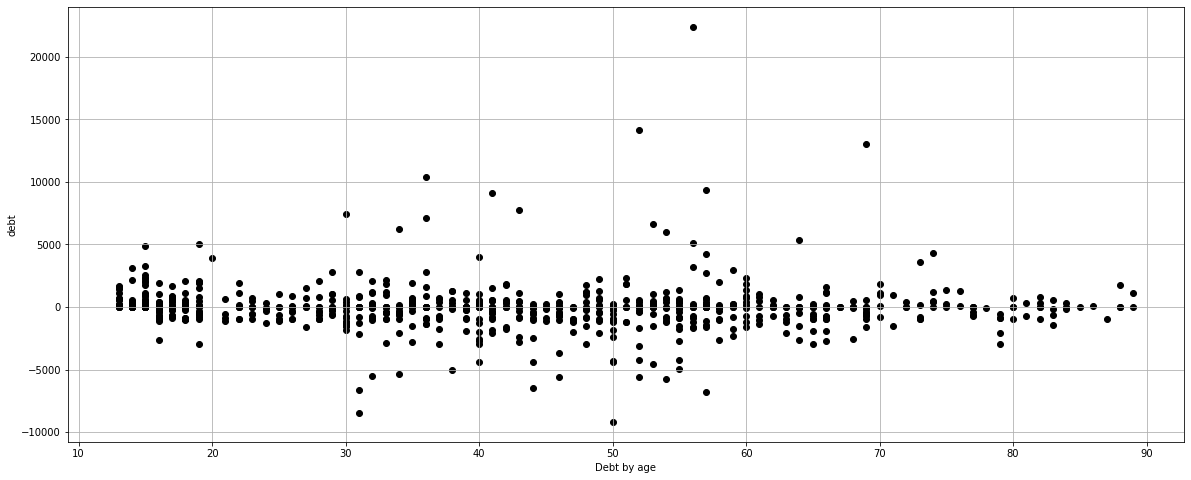

debt                        float64
has_saving_account           object
has_credit_account           object
has_checking_account         object
customers_income              int64
customers_age                 int64
customers_gender             object
customers_marital_status      int64
customers_city_name          object
customers_nbr_children        int64
credit_account_active        object
credit_ending_balance       float64
savings_account_active       object
savings_ending_balance      float64
is debt                        bool
customers_cust_id             int64
dtype: object


In [54]:
# import make_blobs from sklearn
from sklearn.datasets import make_blobs

# import matplotlib
import matplotlib.pyplot as plt

# import Kmeans from sklearn
from sklearn.cluster import KMeans

# import numpy
import numpy as np

#============Takes 2 features from dataframe to numpy array and prepare to send it to the scatterplot
das=df_transactions[['tran_id','tran_amt']].to_numpy()
#============Takes 2 features from dataframe to numpy array and prepare to send it to the scatterplot
das=df_transactions[['tran_id','tran_amt']].to_numpy()

# set figure size
plt.rcParams["figure.figsize"] = (20,8)

# plot clusters

plt.scatter(das[:,0],
            das[:,1],
            c='black',
            marker='o'
            )
plt.xlabel("x")
plt.grid()
plt.show()

# #====sooooo slow
# x = das[:,0]
# y = das[:,1]
# data = np.column_stack((x, y))

# fig, (ax1, ax2) = plt.plot(figsize=(8, 4))

# ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
# ax1.set_title('Scatter: $x$ versus $y$')
# ax1.set_xlabel('$tran_id$')
# ax1.set_ylabel('$tran_amt$')

das=new[['customers_age','debt']].to_numpy()


# set figure size
plt.rcParams["figure.figsize"] = (20,8)

# plot clusters

plt.scatter(das[:,0],
            das[:,1],
            c='black',
            marker='o'
            )
plt.ylabel("debt")
plt.xlabel("age")
plt.xlabel("Debt by age")
plt.grid()
plt.show()

print(new.dtypes)

In [55]:

counts, bins = np.histogram(df_transactions.tran_amt, bins=range(-1000, 1000, 100))
bins = 0.5 * (bins[:-1] + bins[1:])



fig = px.bar(x=bins, y=counts, labels={'x':'Transactions Amount', 'y':'count'})
fig.update_layout(
    title="Distribution of transactions by slice of 100",
    legend_title_font_color="green",
    font=dict(
        family="monospace",
        size=20,
        color="RebeccaPurple"))
fig.show()


# figtrans = px.histogram(df_transactions, x="tran_amt",bins=range(-100, 1000, 100))
# figtrans.update_layout(
#     title="Number of transactions ",
#     legend_title_font_color="green",
    
#     font=dict(
#         family="monospace",
#         size=20,
#         color="RebeccaPurple"))
# figtrans.show()


# need 
# fig = px.histogram(new, x="dept", color  pattern_shape="credit_account_active")
# fig.show()



In [56]:
#are they making lot of small transactions or few huge ones?
#remove the 15K ones
das=df_transactions[['tran_id','tran_amt']].to_numpy()
km = KMeans(n_clusters=5, # how many clusters we expected 
            n_init=20, # how many initial runs
            random_state=0)
# fit and predict
y_km = km.fit_predict(das)

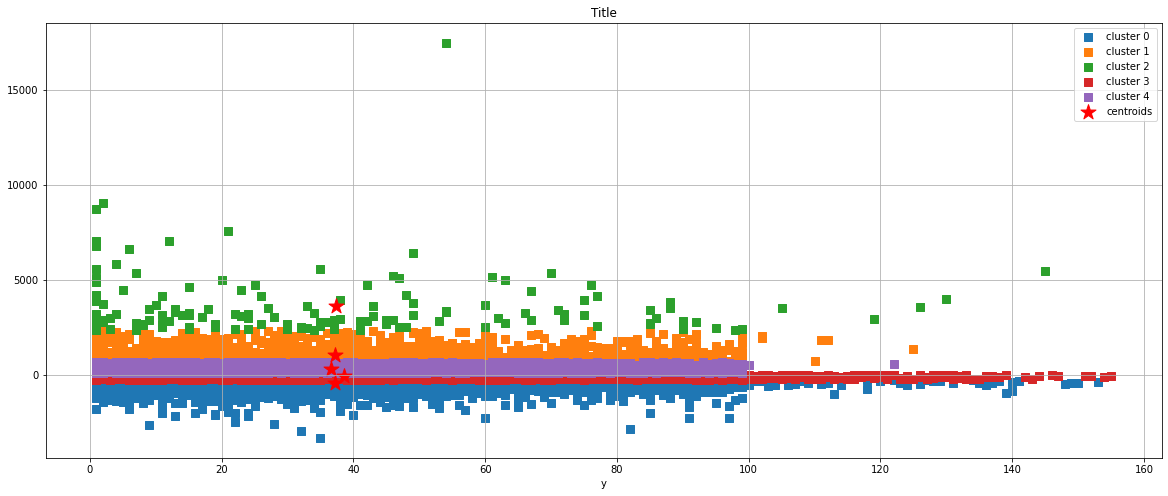

In [57]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.title("Title")
    plt.xlabel("x")
    plt.xlabel("y")
    plt.legend()
    plt.grid()
    plt.show()
     # plot clustering result
plot_clusters(das, y_km, plt_cluster_centers= True)

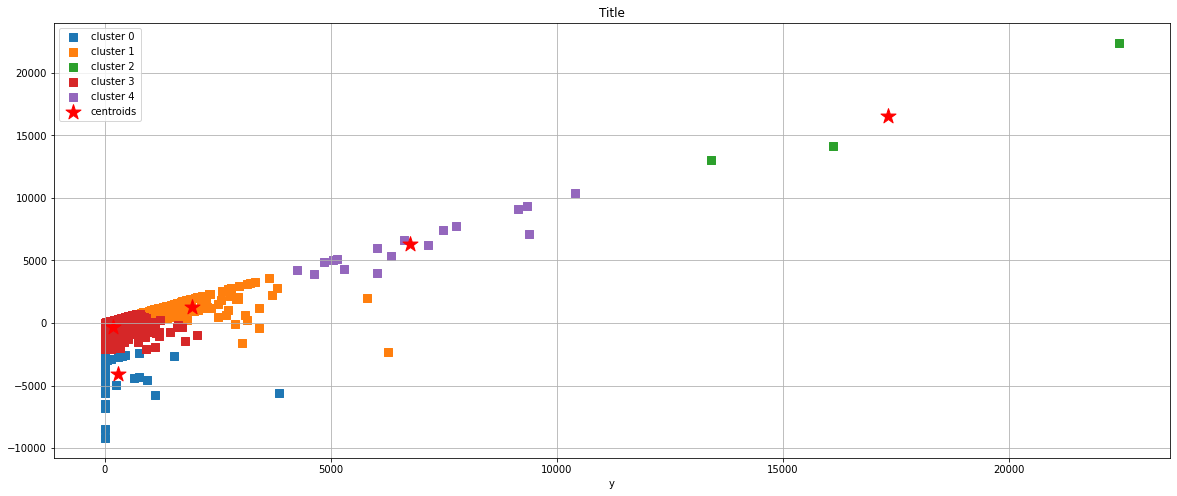

In [58]:
#============Takes 2 features from dataframe to numpy array and prepare to send it to the scatterplot
incomedebt=new[['savings_ending_balance','debt']].to_numpy()

km = KMeans(n_clusters=5, # how many clusters we expected 
            n_init=20, # how many initial runs
            random_state=0)
# fit and predictd
y_km = km.fit_predict(incomedebt)
plot_clusters(incomedebt, y_km, plt_cluster_centers= True)


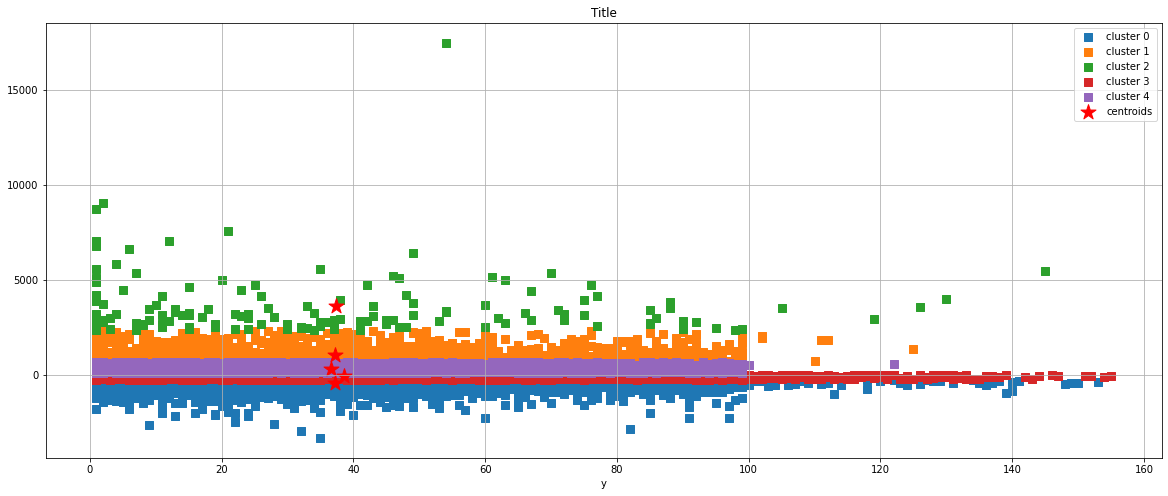

In [59]:
#============Takes 2 features from dataframe to numpy array and prepare to send it to the scatterplot
das=df_transactions[['tran_id','tran_amt']].to_numpy()
km = KMeans(n_clusters=5, # how many clusters we expected 
            n_init=20, # how many initial runs
            random_state=0)
# fit and predict
y_km = km.fit_predict(das)

#plot the cluter, dont forget to insert the numpy array
plot_clusters(das, y_km, plt_cluster_centers= True)


not useful below


In [60]:
# pd.set_option("max_columns", 2) #Showing only two columns
pd.set_option("max_rows", 50)
# twm_savings_accounts[['savings_acct_nbr','savings_cust_id']]
# twm_credit_accounts[['credit_acct_nbr','credit_cust_id']]
# twm_checking_accounts[['checking_acct_nbr','checking_cust_id']]
# df_transactions['u_acc_id']


=========twm_transactions======= 
tran_id            int64
acct_nbr           int64
tran_amt         float64
principal_amt    float64
interest_amt     float64
new_balance      float64
tran_date         object
tran_time          int64
channel           object
tran_code         object


In [ ]:
# import make_blobs from sklearn
from sklearn.datasets import make_blobs

# import matplotlib
import matplotlib.pyplot as plt

# import Kmeans from sklearn
from sklearn.cluster import KMeans

# import numpy
import numpy as np

In [ ]:
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

# plot clusters
plt.scatter(X[:,0],
            X[:,1],
            c='black',
            marker='o')
plt.grid()
plt.show()

In [ ]:
# #DataBase 
# import sqlite3
# from sqlite3 import Error

# def create_connection(path):
#     connection = None
#     try:
#         connection = sqlite3.connect(path)
#         print("Connection to SQLite DB successful")
#     except Error as e:
#         print(f"The error '{e}' occurred")

#     return connection

In [ ]:
# u_connection = create_connection("unified.sqlite")

In [ ]:
# # drop the table before creating it to start fresh
# delete_table_query = """DROP TABLE unified"""
# u_connection.execute(delete_table_query)

In [ ]:
# create_unified_table = """
# CREATE TABLE IF NOT EXISTS unified (
#   id INTEGER PRIMARY KEY AUTOINCREMENT,
#   api TEXT NOT NULL,
#   venue_name TEXT NOT NULL,
#   category_name TEXT NOT NULL,
#   address TEXT NOT NULL,
#   city TEXT NOT NULL
# );
# """

In [ ]:
# def execute_query(connection, query):
#     cursor = connection.cursor()
#     try:
#         cursor.execute(query)
#         connection.commit()
#         print("Query executed successfully")
#     except Error as e:
#         print(f"The error '{e}' occurred")

In [ ]:
# execute_query(u_connection, create_unified_table)  

based on demographics (only on the information from twm_customer)

based on their banking behavior. We can take following things into consideration as banking behavior:
do they have savings account? How much do they save?
do they have credit account? How much do they live in debt?
are they making lot of small transactions or few huge ones?

Link customer to 
customer accounts to 
savings account
credit account? How much do they live in debt?
are they making lot of small transactions or few huge ones?

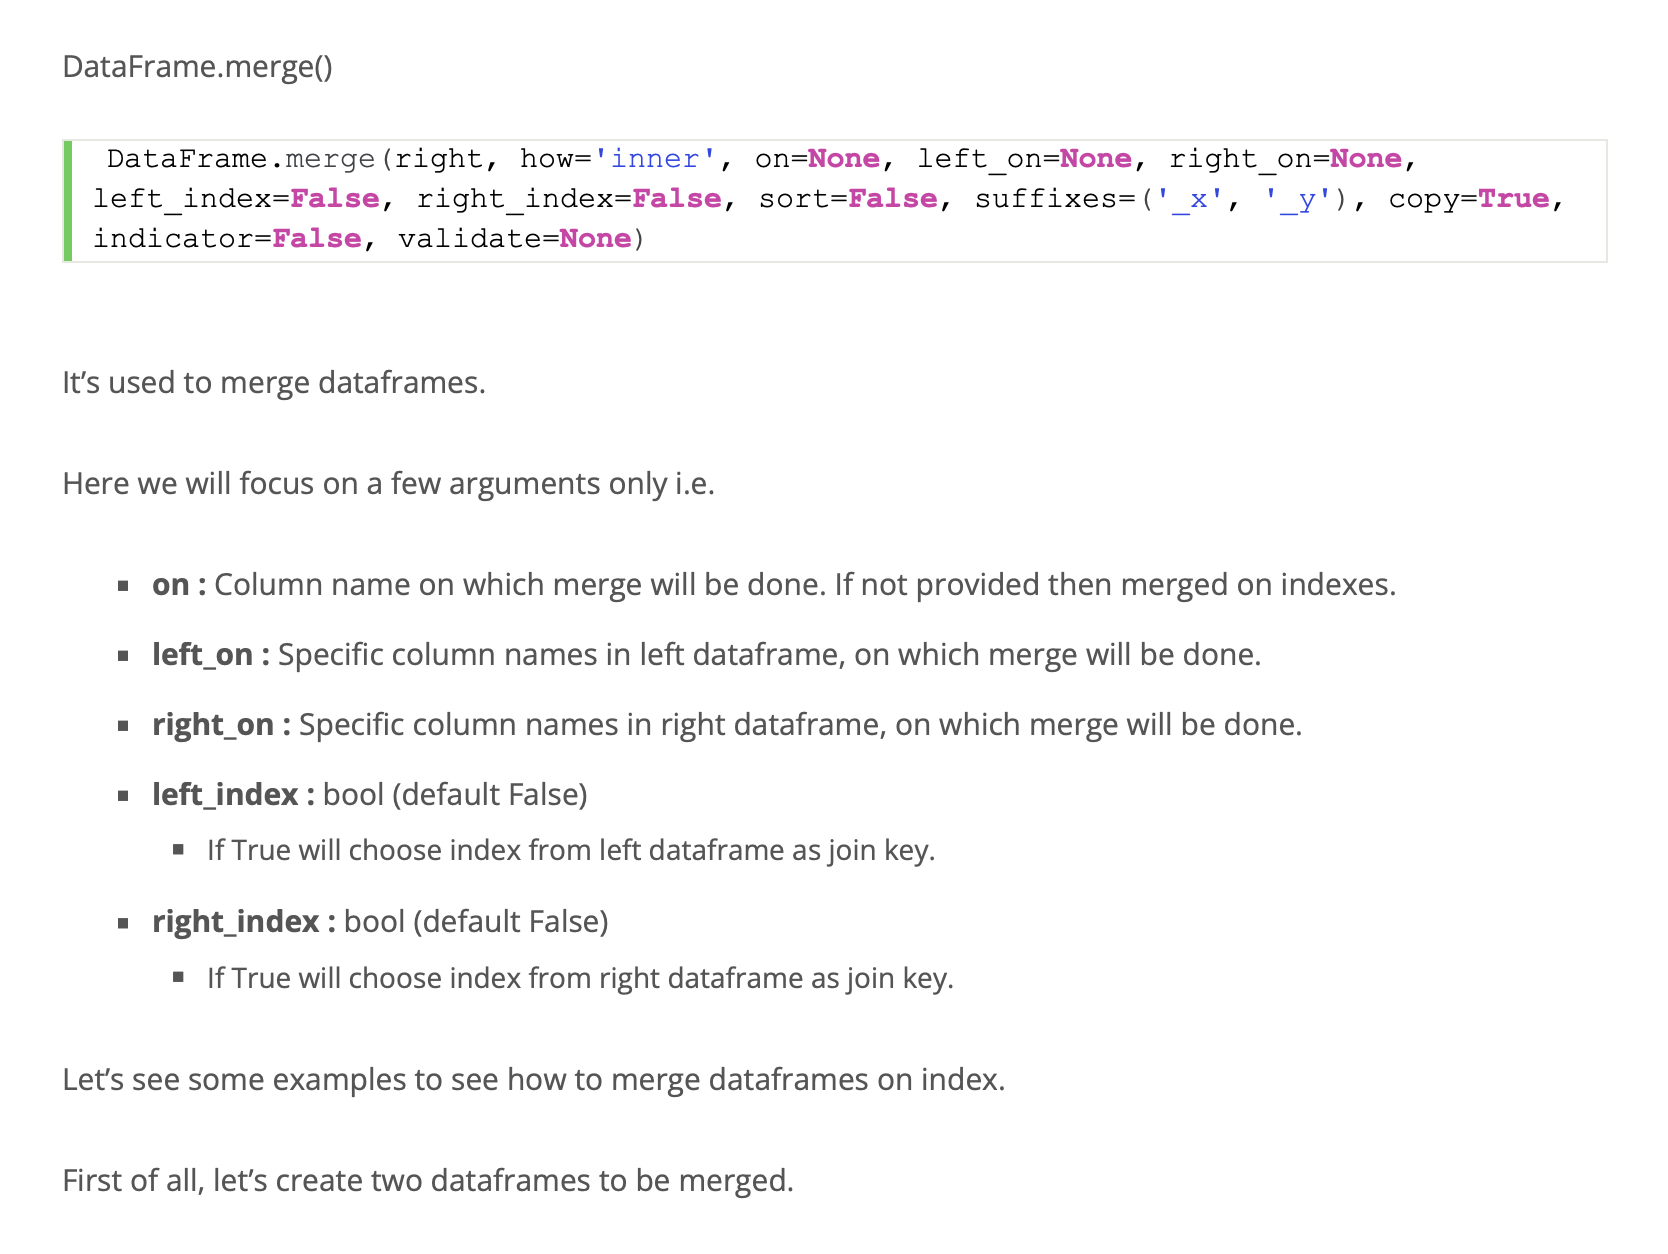

In [ ]:

num_feats = twm_customer.dtypes[~twm_customer.dtypes.isin(['category'])]
print(twm_customer.dtypes)
print(num_feats)

# Scaling
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(twm_customer.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
  'income', 'age', 'years_with_bank', 'nbr_children'])
 
print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()

In [ ]:
twm_customer["body_style_cat"] = twm_customer["body_style"].cat.codes
twm_customer.head()

In [ ]:
# pd.set_option('display.max_rows', twm_customer.shape[0]+1)
# print(twm_customer)

In [ ]:
# missing_values = data.isnull().sum().sort_values(ascending=False)
# percent_of_missing_values = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
# missing_data= pd.concat([missing_values,percent_of_missing_values], axis=1, keys=['Total','Percent'])
# missing_data.head(20)

In [ ]:
# # pd.set_option('display.max_rows', data.shape[0]+1)
# data['Item_Weight'] = data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'))#this is GOLD 


In [ ]:
# print(data.describe()) #Look at some basic descriptive statistics for numerical variables.

In [ ]:

import seaborn as sns

sns.set_style('whitegrid')


df = twm_customer.groupby(['cust_id'])['income'].sum().reset_index()

df['income'].plot(kind='hist')

#action : neeed to find what's happening 

In [ ]:

df = twm_customer[twm_customer['income'] < 20000]

df['income'].plot(kind='hist')

#action : neeed to find what's happening 

In [ ]:

df = twm_customer[twm_customer['income'] < 2500]

df['income'].plot(kind='hist')

#action : neeed to find what's happening 

In [ ]:

df = twm_customer[twm_customer['income'] < 2500]
df = twm_customer[twm_customer['age'] < 20]
df['age'].plot(kind='hist')

#action : neeed to find what's happening 

In [ ]:
''' binning or bucketing with range'''

bins = [0,20, 40, 60, 100]

twm_customer['binned_age'] = pd.cut(twm_customer['age'], bins).astype('str')
5
print ((twm_customer['binned_age'].dtype))


In [ ]:
#

In [ ]:
#High-dimensional PCA Analysis
import plotly.express as px
from sklearn.decomposition import PCA



features = ["income", "age", "nbr_children","years_with_bank"]

fig = px.scatter_matrix(
    twm_customer,
    dimensions=features,
    color="binned_age"
)
fig.update_traces(diagonal_visible=False)
fig.show()



pca = PCA()
components = pca.fit_transform(twm_customer[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=twm_customer["income"]
)
fig.update_traces(diagonal_visible=False)
fig.show()